In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math   
import seaborn as sns

In [150]:
dataset = pd.read_csv(r'C:\Users\win10\OneDrive\Desktop\% DELIVERY\SHARES_DATASET.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverable
0,BAJAJ-AUTO,1541.00,1557.0,1564.65,1470.00,1474.95,1476.50,1499.50,982492.0,NaN,0.5877
1,BAJAJ-AUTO,1476.50,1479.0,1484.80,1420.65,1433.05,1429.80,1436.34,1781719.0,1036859.0,0.5819
2,BAJAJ-AUTO,1429.80,1430.0,1430.00,1368.30,1380.00,1374.50,1388.79,1518567.0,936532.0,0.6167
3,BAJAJ-AUTO,1374.50,1383.2,1391.25,1321.70,1324.50,1327.85,1337.20,2462539.0,1330644.0,0.5404
4,BAJAJ-AUTO,1327.85,1330.0,1352.00,1302.00,1311.00,1316.60,1320.40,2314796.0,1184020.0,0.5115


In [151]:
dataset.shape

(7499, 11)

In [152]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverable
count,7499.000000,7496.000000,7495.000000,7490.000000,7489.000000,7490.000000,7488.000000,7.494000e+03,7.494000e+03,7499.000000
mean,1150.341952,1151.431757,1165.874229,1135.856756,1150.346074,1150.399706,1150.817202,7.314958e+06,2.889970e+06,0.415838
std,967.178074,968.518625,979.376460,957.713793,968.390468,968.382110,968.889051,1.074412e+07,5.325510e+06,0.166959
min,183.000000,184.300000,185.950000,180.750000,182.750000,183.000000,183.070000,6.324000e+03,1.290000e+03,0.045100
25%,367.400000,368.175000,373.400000,361.787500,366.950000,367.350000,367.462500,5.153375e+05,2.549128e+05,0.280100
50%,606.200000,607.700000,614.150000,595.825000,604.750000,604.350000,605.170000,3.942944e+06,1.237560e+06,0.419900
75%,1912.475000,1912.500000,1938.000000,1890.937500,1915.000000,1916.112500,1913.592500,9.542164e+06,3.045730e+06,0.543800
max,4168.950000,4168.000000,4271.150000,4117.250000,4205.000000,4201.450000,4192.410000,2.868577e+08,2.325307e+08,0.965900


In [153]:
from sklearn.impute import SimpleImputer  
imputer= SimpleImputer(missing_values =np.nan, strategy='mean')  
imputer.fit(X[:, 1:])  
X[:, 1:]= imputer.transform(X[:, 1:]) 

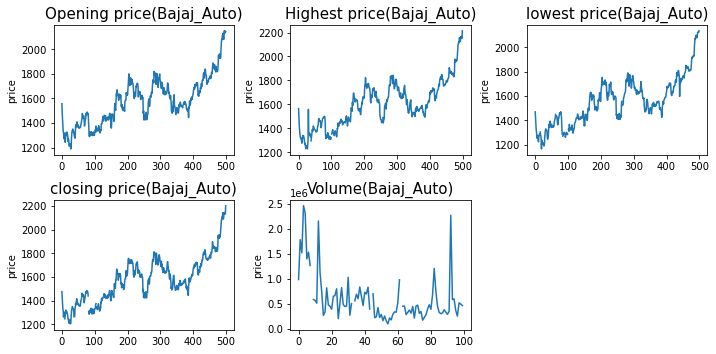

In [154]:
plt.figure(figsize=(10,5))

close_bajaj = dataset.iloc[:500, -5].values
open_bajaj = dataset.iloc[:500, -9].values
high_bajaj=dataset.iloc[:500, -8].values
vol_bajaj=dataset.iloc[:100, -3].values
low_bajaj=dataset.iloc[:500, -7].values

plt.subplot(2,3,1)
plt.title("Opening price(Bajaj_Auto)", fontsize=15)
plt.plot(open_bajaj)
plt.ylabel("price")

plt.subplot(2,3,2)
plt.title("Highest price(Bajaj_Auto)", fontsize=15)
plt.plot(high_bajaj)
plt.ylabel("price")

plt.subplot(2,3,3)
plt.title("lowest price(Bajaj_Auto)", fontsize=15)
plt.plot(low_bajaj)
plt.ylabel("price")

plt.subplot(2,3,4)
plt.title("closing price(Bajaj_Auto)", fontsize=15)
plt.plot(close_bajaj)
plt.ylabel("price")

plt.subplot(2,3,5)
plt.title("Volume(Bajaj_Auto)", fontsize=15)
plt.plot(vol_bajaj)
plt.ylabel("price")

plt.tight_layout(pad=1.0)
plt.show()

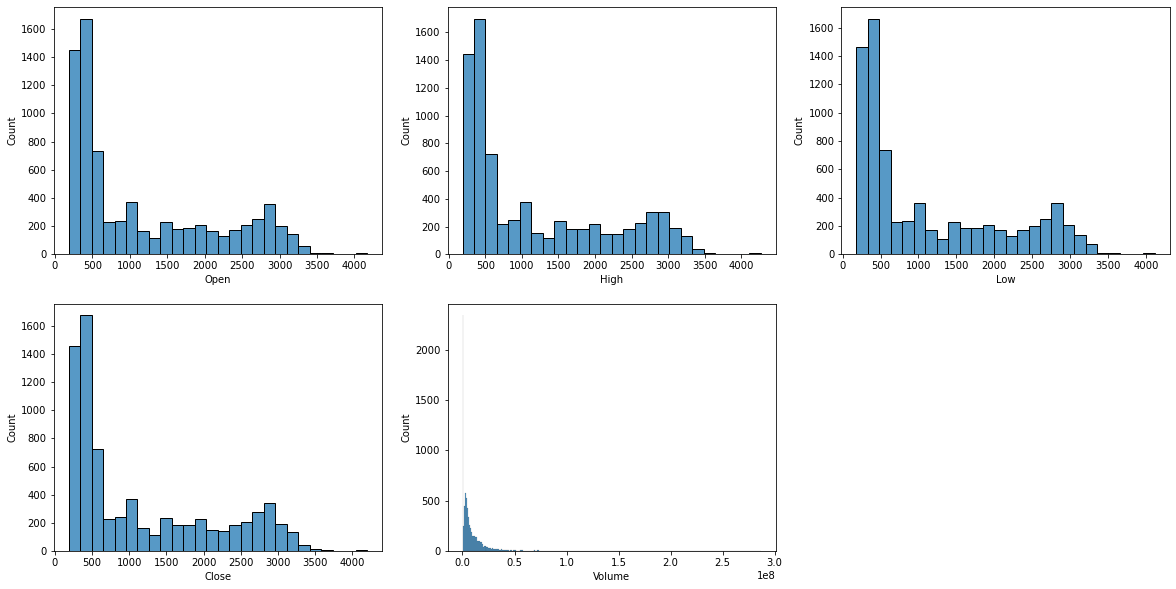

In [155]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(dataset[col])
plt.show()

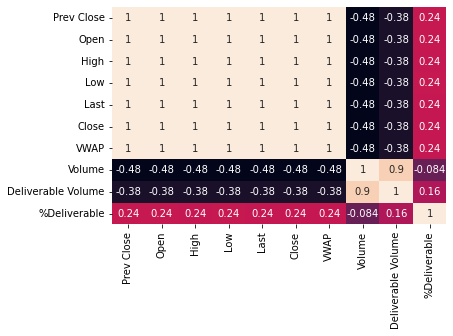

In [156]:
sns.heatmap(dataset.corr(),
            annot=True,
            cbar=False)
plt.show()

In [157]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))


In [158]:
print(X[0])

[1.0 0.0 0.0 1541.0 1557.0 1564.65 1470.0 1474.95 1476.5 1499.5 982492.0
 2889970.251534561]


In [159]:
X_a = dataset.iloc[:, 1:-1].values

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [161]:
print(X_test)


[[1.0 0.0 0.0 ... 2888.38 165523.0 84052.0]
 [0.0 0.0 1.0 ... 414.91 2771223.0 721174.0]
 [0.0 0.0 1.0 ... 541.6 17025425.0 4370219.0]
 ...
 [1.0 0.0 0.0 ... 2864.81 301774.0 57356.0]
 [1.0 0.0 0.0 ... 1248.21 387073.0 271294.0]
 [0.0 1.0 0.0 ... 398.24 10493872.0 4743671.0]]


In [162]:
from sklearn.linear_model import LinearRegression
regressor_m=LinearRegression()
regressor_m.fit(X_train,y_train)

LinearRegression()

In [163]:
from sklearn.ensemble import RandomForestRegressor
regressor_r = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_r.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [164]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =2 )
X_poly = poly_reg.fit_transform(X_train)
regressor_P = LinearRegression()
regressor_P.fit(X_poly, y_train)

LinearRegression()

# Polynomial Regression

In [165]:
y_pred_P = regressor_P.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=4)
print(np.concatenate((y_pred_P.reshape(len(y_pred_P),1), y_test.reshape(len(y_test),1)),1))

[[0.4513 0.5078]
 [0.2869 0.2602]
 [0.2563 0.2567]
 ...
 [0.361  0.1901]
 [0.5331 0.7009]
 [0.4419 0.452 ]]


In [166]:
from sklearn.metrics import r2_score
r2_P=r2_score(y_test,y_pred_P)
print("R2 Score is",r2_P)

R2 Score is 0.40369757066484313


In [167]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_P)  
rmse = math.sqrt(mse)  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.12736556493211904


## Random forest regression

In [168]:
y_pred_r=regressor_r.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_r.reshape(len(y_pred_r),1),y_test.reshape(len(y_pred_r),1)),1))

[[0.52 0.51]
 [0.27 0.26]
 [0.25 0.26]
 ...
 [0.21 0.19]
 [0.71 0.7 ]
 [0.46 0.45]]


In [169]:
from sklearn.metrics import r2_score
r2_RF=r2_score(y_test,y_pred_r)
print("R2 Score is",r2_RF)

R2 Score is 0.965673106178486


In [170]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_r) 
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.030558778479077554


In [171]:
print(regressor_r.predict([[0, 1, 0, 1541, 1557, 1564.65, 1470, 1474.95, 1476.5, 1499.5, 982492, 577454]]))

[0.63]


## Multiple regression 

In [172]:
y_pred_m=regressor_m.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1),y_test.reshape(len(y_pred_m),1)),1))

[[0.46 0.51]
 [0.3  0.26]
 [0.2  0.26]
 ...
 [0.41 0.19]
 [0.59 0.7 ]
 [0.52 0.45]]


In [173]:
from sklearn.metrics import r2_score
r2_M=r2_score(y_test,y_pred_m)
print("R2 Score is",r2_M)

R2 Score is 0.563110381367402


In [174]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_m) 
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.10901960382926534


# Prediction

In [175]:
if r2_M>r2_RF and r2_M>r2_P:
    print("% Deliverable is",regressor_m.predict([[0, 1, 0, 1541, 1557, 1564.65, 1470, 1474.95, 1476.5, 1499.5, 982492, 577454]]))
elif r2_RF>r2_M and r2_RF>r2_P:
    print("% Deliverable is",regressor_r.predict([[0, 1, 0, 1541, 1557, 1564.65, 1470, 1474.95, 1476.5, 1499.5, 982492, 577454]]))
else:
    print("% Deliverable is",regressor_P.predict([[0, 1, 0, 1541, 1557, 1564.65, 1470, 1474.95, 1476.5, 1499.5, 982492, 577454]]))

% Deliverable is [0.63]


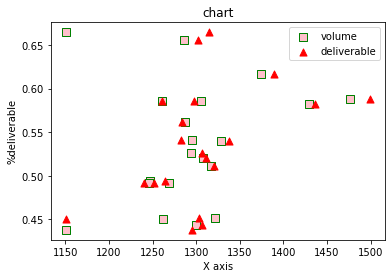

In [180]:
plt.scatter(X[:20, 8], y[:20], color = 'pink',s = 50,edgecolor ="green",marker ="s")
plt.scatter(X[:20, 9], y[:20], color = 'red',s = 50,edgecolor ="red",marker ="^")
#plt.plot(X, regressor_r.predict(X), color = 'blue')
plt.title('chart')
plt.xlabel('X axis')
plt.ylabel('%deliverable')

plt.legend(['volume','deliverable'])
plt.show()